In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
# imports
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# find the are between two z values, lower limit (Zl) and upper limit (Zu)
Zl = -1.96
Zu = 1.96
# this is the answer we expect
round(stats.norm.cdf(Zu) - stats.norm.cdf(Zl),4)

0.95

In [49]:
# introducing the density curve and establishing the maximum height of a std normal curve

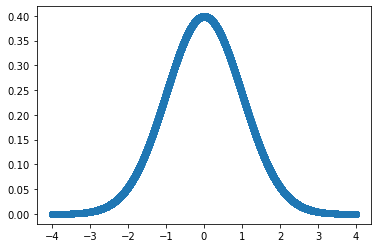

In [50]:
z = np.linspace(-4,4,10000)
pdfs = stats.norm.pdf(z)
plt.scatter(z,pdfs);

In [61]:
# at z=0 the curve has max density and it is equal to 1/sqrt(2*pi)
k = 1/np.sqrt(2*np.pi)
k

0.3989422804014327

In [52]:

n = 100000
x = np.random.uniform(Zl,Zu,size=n)
y = np.random.uniform(0,k,size=n)

In [53]:
pdfs = stats.norm.pdf(x)

In [54]:
df = pd.DataFrame({'x':x,'y':y,'pdfs':pdfs})

In [55]:
df.head()

,x,y,pdfs
0,0.704127,0.210642,0.311351
1,1.685822,0.206329,0.096334
2,-1.097132,0.114634,0.218540
3,-0.734449,0.049691,0.304633
4,0.697209,0.027729,0.312863


In [56]:
df.loc[df.y>df.pdfs,'locn'] = "above curve"
df.loc[df.y<=df.pdfs,'locn'] = "under curve"

In [57]:
df.head(10)

,x,y,pdfs,locn
0,0.704127,0.210642,0.311351,under curve
1,1.685822,0.206329,0.096334,above curve
2,-1.097132,0.114634,0.218540,under curve
3,-0.734449,0.049691,0.304633,under curve
4,0.697209,0.027729,0.312863,under curve
5,-1.476542,0.326238,0.134119,above curve
6,1.503242,0.005871,0.128889,under curve
7,0.586191,0.331721,0.335965,under curve
8,-1.140185,0.179332,0.208264,under curve
9,0.395169,0.197216,0.368978,under curve


In [58]:
# this is the fraction of the dots which fall within the normal curve
fraxn = len(df[df.locn=="under curve"])/n
fraxn*n

60695.0

In [62]:
# (Zu-Zl) is the base, k is the height so the product is the rectangle area.
round((Zu-Zl) * fraxn,4)

2.3792

In [63]:
# multiply by fraxn to get the area under the density curve
round((Zu-Zl) * k * fraxn,4)

0.9492

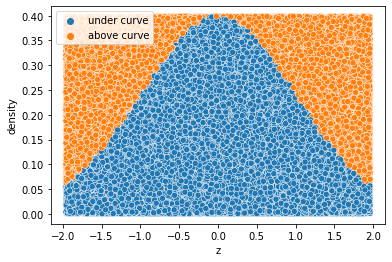

In [71]:
ax = sns.scatterplot(hue='locn',x='x',y='y', data=df)
ax.legend(loc='upper left')
plt.xlabel('z')
plt.ylabel('density');